In [ ]:
import numpy as np
import pandas as pd
import time
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [ ]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [ ]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaled = sc.fit_transform(x)
x_scaled

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059],
       [-1.01769239, -0.34481683],
       [-1.01769239,  0.41866944],
       [-0.54012675,  2.35674998],
       [-1.20871865, -1.07893824],
       [-0.25358736, -0.13926283],
       [-1.11320552,  0.30121002],
       [-1.11320552, -0.52100597],
       [-1.6862843 ,  0.47739916],
       [-0.54012675, -1.51941109],
       [-1.87731056,  0.35993973],
       [-0.82666613,  0.30121002],
       [ 0.89257019, -1.3138571 ],
       [ 0.70154394, -1.28449224],
       [ 0.79705706, -1.22576253],
       [ 0.98808332, -1.19639767],
       [ 0.70154394, -1.40195167],
       [ 0.89257019, -0.60910054],
       [ 0.98808332, -0.84401939],
       [ 0.70154394, -1.40195167],
       [ 0.79705706, -1.37258681],
       [ 0.89257019, -1.46068138],
       [ 1.08359645, -1.22576253],
       [ 0.89257019, -1.16703281],
       [-0.82666613,

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)

In [ ]:
print(x_train.shape, x_test.shape)

(320, 2) (80, 2)


In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim = 2))
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               384       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'])

# Batch GD

In [ ]:
start = time.time()
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=320)
print(time.time()-start)

Epoch 1/10
1/1 [==============================] - 6s 6s/step - loss: 0.7004 - accuracy: 0.4938 - val_loss: 0.6364 - val_accuracy: 0.8125
Epoch 2/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6449 - accuracy: 0.7625 - val_loss: 0.5943 - val_accuracy: 0.8500
Epoch 3/10
1/1 [==============================] - 0s 36ms/step - loss: 0.6108 - accuracy: 0.7969 - val_loss: 0.5616 - val_accuracy: 0.8625
Epoch 4/10
1/1 [==============================] - 0s 37ms/step - loss: 0.5851 - accuracy: 0.8062 - val_loss: 0.5340 - val_accuracy: 0.8625
Epoch 5/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5637 - accuracy: 0.8094 - val_loss: 0.5099 - val_accuracy: 0.8750
Epoch 6/10
1/1 [==============================] - 0s 34ms/step - loss: 0.5456 - accuracy: 0.8219 - val_loss: 0.4886 - val_accuracy: 0.8875
Epoch 7/10
1/1 [==============================] - 0s 32ms/step - loss: 0.5297 - accuracy: 0.8219 - val_loss: 0.4693 - val_accuracy: 0.8875
Epoch 8/10
1/1 [=============

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# SGD

In [ ]:
model1 = Sequential()
model1.add(Dense(128, activation='relu', input_dim = 2))
model1.add(Dense(128, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               384       
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history1 = model1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=1)
print(time.time()-start)

Epoch 1/10
320/320 [==============================] - 2s 4ms/step - loss: 0.3721 - accuracy: 0.8250 - val_loss: 0.1739 - val_accuracy: 0.9250
Epoch 2/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2950 - accuracy: 0.8906 - val_loss: 0.1735 - val_accuracy: 0.9250
Epoch 3/10
320/320 [==============================] - 1s 4ms/step - loss: 0.2889 - accuracy: 0.9000 - val_loss: 0.1726 - val_accuracy: 0.9125
Epoch 4/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3185 - accuracy: 0.8938 - val_loss: 0.1663 - val_accuracy: 0.9500
Epoch 5/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2972 - accuracy: 0.9031 - val_loss: 0.1819 - val_accuracy: 0.9250
Epoch 6/10
320/320 [==============================] - 1s 3ms/step - loss: 0.3064 - accuracy: 0.9125 - val_loss: 0.1802 - val_accuracy: 0.9500
Epoch 7/10
320/320 [==============================] - 1s 3ms/step - loss: 0.2924 - accuracy: 0.9062 - val_loss: 0.1880 - val_accuracy: 0.9500
Epoch 

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# SGD : Time : 11.382084608078003 : loss: 0.3006 - accuracy: 0.9062 - val_loss: 0.1735 - val_accuracy: 0.9500

# MBGD

In [ ]:
model2 = Sequential()
model2.add(Dense(128, activation='relu', input_dim = 2))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,025
Trainable params: 17,025
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
start = time.time()
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=100)
print(time.time()-start)

Epoch 1/10
4/4 [==============================] - 1s 131ms/step - loss: 0.6305 - accuracy: 0.6750 - val_loss: 0.5125 - val_accuracy: 0.8500
Epoch 2/10
4/4 [==============================] - 0s 37ms/step - loss: 0.5221 - accuracy: 0.8156 - val_loss: 0.4377 - val_accuracy: 0.9000
Epoch 3/10
4/4 [==============================] - 0s 24ms/step - loss: 0.4720 - accuracy: 0.8313 - val_loss: 0.3868 - val_accuracy: 0.9125
Epoch 4/10
4/4 [==============================] - 0s 11ms/step - loss: 0.4373 - accuracy: 0.8406 - val_loss: 0.3435 - val_accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 0s 11ms/step - loss: 0.4085 - accuracy: 0.8531 - val_loss: 0.3127 - val_accuracy: 0.9000
Epoch 6/10
4/4 [==============================] - 0s 13ms/step - loss: 0.3863 - accuracy: 0.8844 - val_loss: 0.2866 - val_accuracy: 0.9250
Epoch 7/10
4/4 [==============================] - 0s 11ms/step - loss: 0.3650 - accuracy: 0.8906 - val_loss: 0.2598 - val_accuracy: 0.9250
Epoch 8/10
4/4 [==========

In [ ]:
start = time.time()
history2 = model2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), batch_size=32)
print(time.time()-start)

Epoch 1/10
10/10 [==============================] - 1s 30ms/step - loss: 0.5783 - accuracy: 0.7719 - val_loss: 0.4238 - val_accuracy: 0.9000
Epoch 2/10
10/10 [==============================] - 0s 9ms/step - loss: 0.4512 - accuracy: 0.8281 - val_loss: 0.3206 - val_accuracy: 0.9125
Epoch 3/10
10/10 [==============================] - 0s 9ms/step - loss: 0.3901 - accuracy: 0.8406 - val_loss: 0.2621 - val_accuracy: 0.9000
Epoch 4/10
10/10 [==============================] - 0s 10ms/step - loss: 0.3515 - accuracy: 0.8562 - val_loss: 0.2284 - val_accuracy: 0.9125
Epoch 5/10
10/10 [==============================] - 0s 9ms/step - loss: 0.3256 - accuracy: 0.8813 - val_loss: 0.2046 - val_accuracy: 0.9125
Epoch 6/10
10/10 [==============================] - 0s 10ms/step - loss: 0.3053 - accuracy: 0.8844 - val_loss: 0.1942 - val_accuracy: 0.9375
Epoch 7/10
10/10 [==============================] - 0s 10ms/step - loss: 0.2888 - accuracy: 0.9031 - val_loss: 0.1852 - val_accuracy: 0.9125
Epoch 8/10
10/10

In [ ]:
# BGD : Time : 1.4552509784698486  : loss: 0.4827 - accuracy: 0.8562 - val_loss: 0.4097 - val_accuracy: 0.8875

# MBGD : Time : 3.066321849822998 : loss: 0.3202 - accuracy: 0.8969 - val_loss: 0.2096 - val_accuracy: 0.9375

# SGD : Time : 11.382084608078003 : loss: 0.3006 - accuracy: 0.9062 - val_loss: 0.1735 - val_accuracy: 0.9500

# Visualization

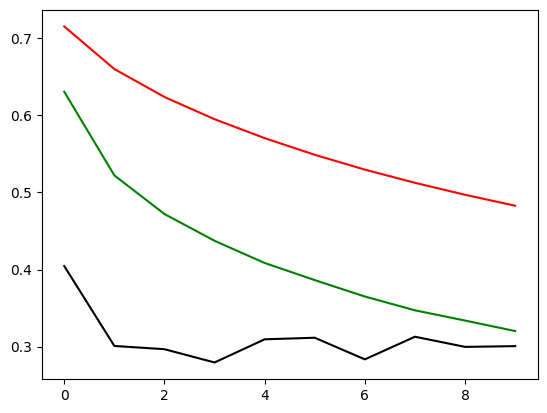

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], color='red')
plt.plot(history1.history['loss'],color='black')
plt.plot(history2.history['loss'],  color='green')

# Exponentially Weighted Moving Averate (EWMA)

In [ ]:
# it means that as we move forward, we simultaneously calculate the avg points (10 days for more stable : beta=0.9).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/DailyDelhiClimate.csv')
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [ ]:
df = df[['date','meantemp']]
df.head()

,date,meantemp
0,2017-01-01,15.913043
1,2017-01-02,18.500000
2,2017-01-03,17.111111
3,2017-01-04,18.700000
4,2017-01-05,18.388889


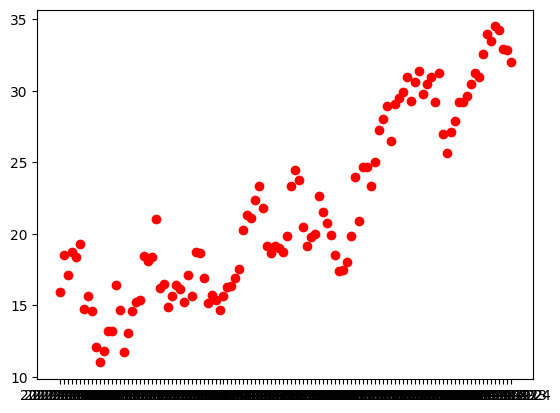

In [ ]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.show()

In [ ]:
x1 = df['meantemp'].ewm(alpha=0.9).mean()

In [ ]:
x2 = df['meantemp'].ewm(alpha=0.5).mean()
x3 = df['meantemp'].ewm(alpha=0.2).mean()
x4 = df['meantemp'].ewm(alpha=0.98).mean()

In [ ]:
x1

0      15.913043
1      18.264822
2      17.225443
3      18.552677
4      18.405266
         ...    
109    34.403401
110    34.265340
111    33.036534
112    32.891153
113    32.089115
Name: meantemp, Length: 114, dtype: float64

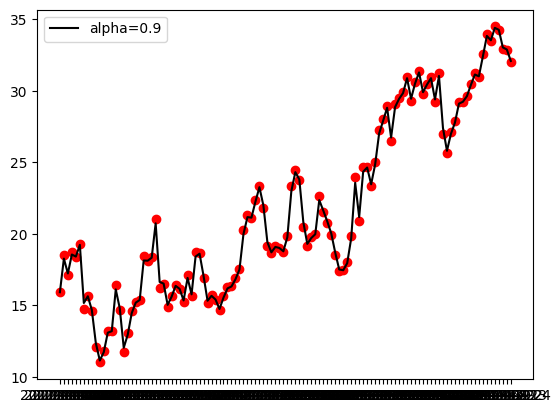

In [ ]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x1, color='black', label='alpha=0.9')
plt.legend()
plt.show()

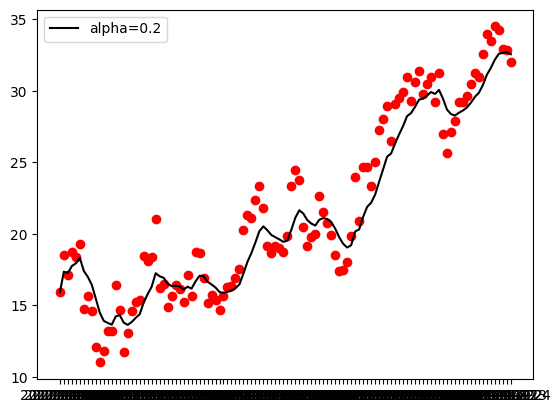

In [ ]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x3, color='black', label='alpha=0.2')
plt.legend()
plt.show()

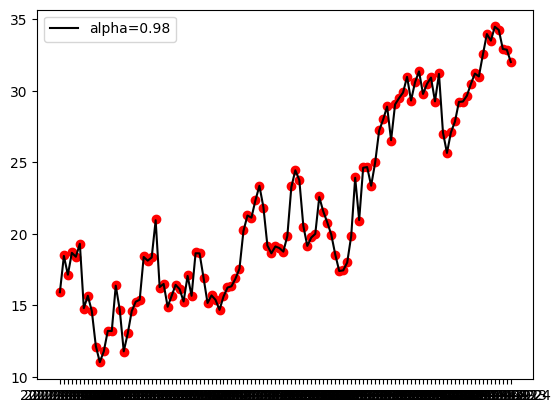

In [ ]:
plt.scatter(df['date'], df['meantemp'], color='red')
plt.plot(df['date'], x4, color='black', label='alpha=0.98')
plt.legend()
plt.show()

# All optimization method together

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import *

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [2]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)

input_shape = (28,28,1)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Normalization
x_train = x_train/255.0
x_test = x_test /255.0

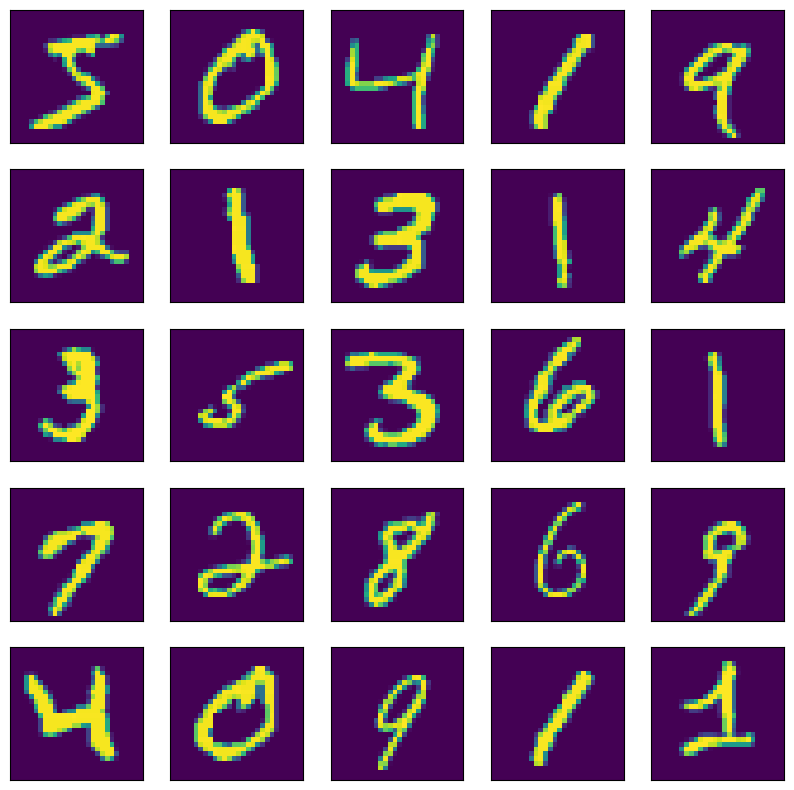

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i])

plt.show()

In [4]:
def build_model(optimizer):
  model = Sequential()
  model.add(Flatten())
  model.add(Dense(256, activation='relu', input_shape=input_shape))
  model.add(Dropout(0.25))
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.50))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer=optimizer, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])
  return model

In [5]:
# Final part - train the model and validate with test data
optimizers = ['SGD', 'Adadelta', 'Adagrad', 'RMSprop','Adam']

for i in optimizers:
  model = build_model(i)
  history = model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test), verbose=1)

Epoch 1/10
938/938 [==============================] - 11s 5ms/step - loss: 1.0905 - accuracy: 0.6645 - val_loss: 0.4439 - val_accuracy: 0.8860
Epoch 2/10
938/938 [==============================] - 5s 5ms/step - loss: 0.5305 - accuracy: 0.8433 - val_loss: 0.3291 - val_accuracy: 0.9078
Epoch 3/10
938/938 [==============================] - 4s 4ms/step - loss: 0.4267 - accuracy: 0.8742 - val_loss: 0.2820 - val_accuracy: 0.9201
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3704 - accuracy: 0.8915 - val_loss: 0.2500 - val_accuracy: 0.9268
Epoch 5/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3328 - accuracy: 0.9016 - val_loss: 0.2235 - val_accuracy: 0.9351
Epoch 6/10
938/938 [==============================] - 4s 4ms/step - loss: 0.3032 - accuracy: 0.9121 - val_loss: 0.2068 - val_accuracy: 0.9391
Epoch 7/10
938/938 [==============================] - 4s 4ms/step - loss: 0.2804 - accuracy: 0.9196 - val_loss: 0.1910 - val_accuracy: 0.9425
Epoch

In [ ]:
# SGD : loss: 0.2333 - accuracy: 0.9336 - val_loss: 0.1599 - val_accuracy: 0.9526
# Adadelta : loss: 1.6580 - accuracy: 0.5301 - val_loss: 1.4807 - val_accuracy: 0.7265
# Adagrad : loss: 0.4531 - accuracy: 0.8647 - val_loss: 0.3105 - val_accuracy: 0.9128
# RMSProp : loss: 0.0691 - accuracy: 0.9815 - val_loss: 0.0886 - val_accuracy: 0.9809 *********
# Adam : loss: 0.0542 - accuracy: 0.9828 - val_loss: 0.0696 - val_accuracy: 0.9790 **************************